<a href="https://colab.research.google.com/github/AkashK18/OIBSIP/blob/main/Task1_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task-1 IRIS Classification

By- Akash Sanjay Kagdelwar
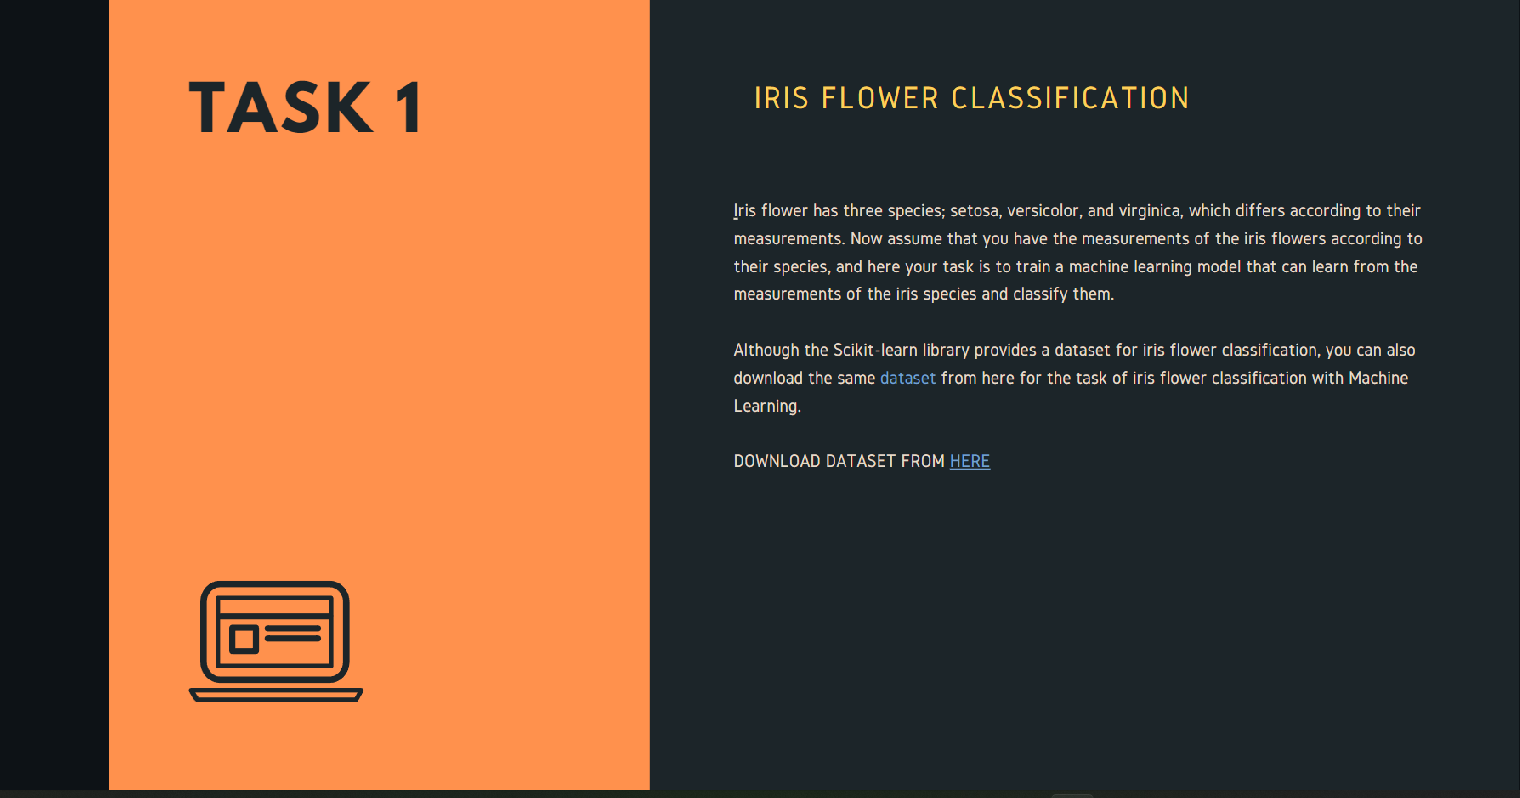

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Let's mount the googlr drive for importing dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Loading dataset
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')

# Data Exploration

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
#Checking dor NULL values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No nulll values present in dataset

## EDA

<Axes: ylabel='SepalLengthCm'>

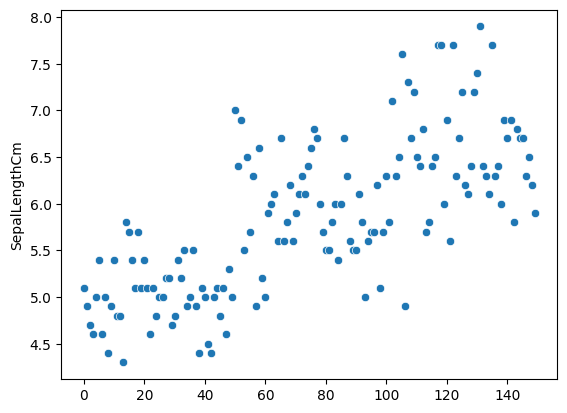

In [12]:
sns.scatterplot(df['SepalLengthCm'])

<Axes: ylabel='PetalWidthCm'>

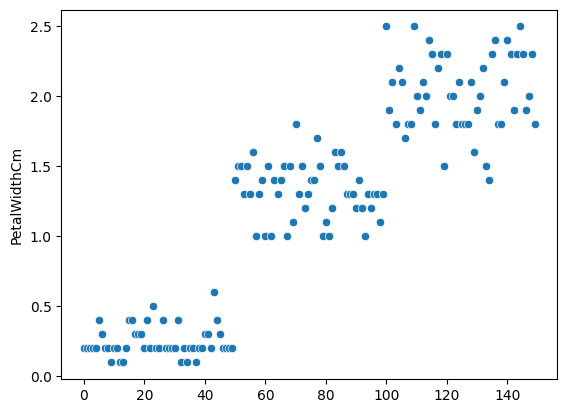

In [14]:
sns.scatterplot(df['PetalWidthCm'])

In [ ]:
sns.distplot(df[df['Species']=='Iris-setosa']['PetalLengthCm'], color='red')
sns.distplot(df[df['Species']=='Iris-versicolor']['PetalLengthCm'], color='blue')
sns.distplot(df[df['Species']=='Iris-virginica']['PetalLengthCm'], color='green')

<Axes: xlabel='SepalLengthCm', ylabel='Density'>

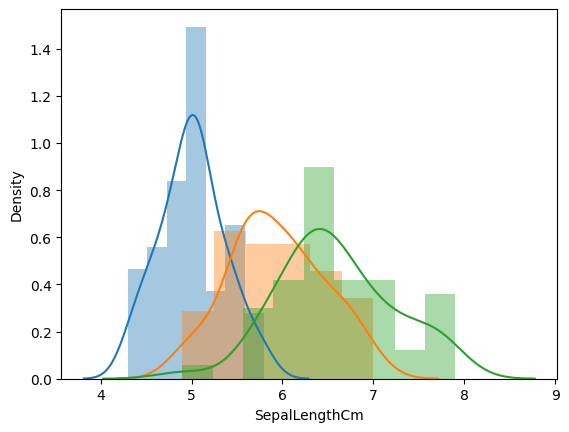

In [17]:
sns.distplot(df[df['Species']=='Iris-setosa']['SepalLengthCm'])
sns.distplot(df[df['Species']=='Iris-versicolor']['SepalLengthCm'])
sns.distplot(df[df['Species']=='Iris-virginica']['SepalLengthCm'])

<Axes: xlabel='PetalWidthCm', ylabel='Density'>

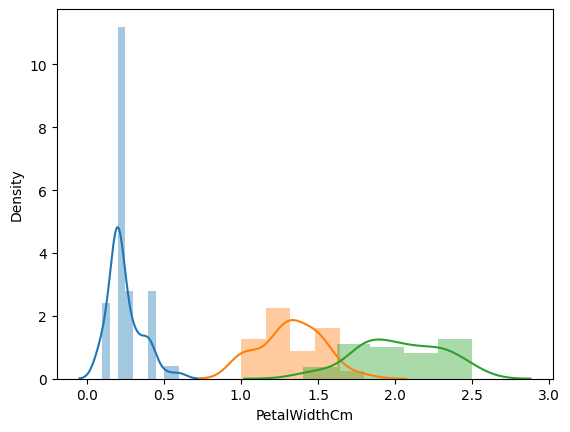

In [18]:
sns.distplot(df[df['Species']=='Iris-setosa']['PetalWidthCm'])
sns.distplot(df[df['Species']=='Iris-versicolor']['PetalWidthCm'])
sns.distplot(df[df['Species']=='Iris-virginica']['PetalWidthCm'])

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

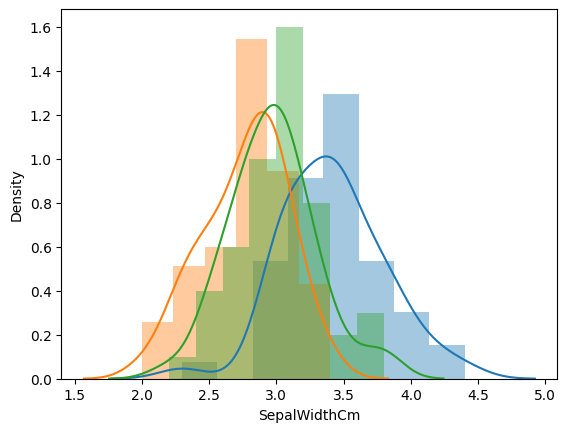

In [19]:
sns.distplot(df[df['Species']=='Iris-setosa']['SepalWidthCm'])
sns.distplot(df[df['Species']=='Iris-versicolor']['SepalWidthCm'])
sns.distplot(df[df['Species']=='Iris-virginica']['SepalWidthCm'])

In [20]:
df1 = df.copy()

In [21]:
df1['PetalWidthCm'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

<Axes: >

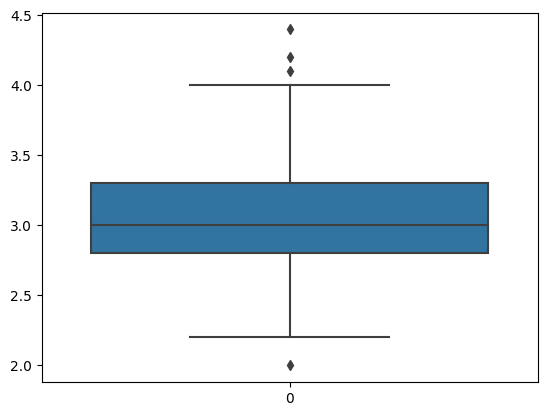

In [22]:
#Checking for Outliers
sns.boxplot(df1['SepalWidthCm'])

In [23]:
#Removing the Outliers using the IQR method
Q1 = df1['SepalWidthCm'].quantile(0.25)
Q3 = df1['SepalWidthCm'].quantile(0.75)
IQR = Q3-Q1
l1 = Q1-1.5*IQR
u1 = Q3+1.5*IQR

In [24]:
df1 = df1[(df1['SepalWidthCm']<u1) & (df1['SepalWidthCm']>l1)]

In [25]:
df1.shape

(146, 6)

In [27]:
#Dropping  the ID feature as it is not important for the model
df1 = df1.drop(['Id'], axis=1)

In [29]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [30]:
#Encoding the target variable using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Species']=le.fit_transform(df1['Species'])
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
#Performing train test split
from sklearn.model_selection import train_test_split as tts
x = df1.drop(['Species'], axis = 1)
y = df1['Species']
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.2, random_state=42)

In [32]:
y_train.value_counts()

1    41
2    40
0    35
Name: Species, dtype: int64

## Model Training And Evaluation

In [33]:
from sklearn.metrics import accuracy_score as ac, precision_score as pc, f1_score as f1

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [35]:
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [36]:
ac(y_pred_lr, y_test)

0.9333333333333333

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
ac(y_pred_knn, y_test)

0.9666666666666667

In [38]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(x_train, y_train)
y_pred_cnb = cnb.predict(x_test)
ac(y_pred_cnb, y_test)

0.9333333333333333

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
ac(y_pred_gnb, y_test)

0.9333333333333333

In [40]:
def pred_class(pred):
  if pred[0]==0:
    print("Class: Setosa")
  elif pred[0]==1:
    print("Class: Versicolor")
  else:
    print("Class: Virginica")

In [41]:
#Testing various test arrays in order to predict their species
test_ar = [[2.4,1,1.5,2.7]]
pred_test=knn.predict(test_ar)
pred_class(pred_test)

Class: Setosa


In [43]:
test_ar2 = [[3.4,4,2.5,2.9]]
pred_test1=knn.predict(test_ar2)
pred_class(pred_test1)

Class: Versicolor


Thank You!